In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


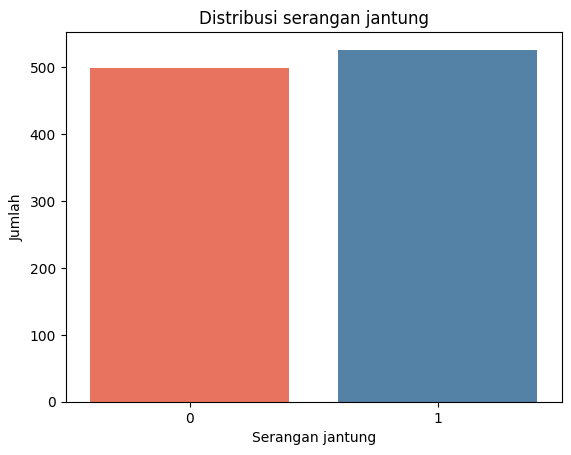

In [7]:
sns.countplot(data=df, x="target", palette=['#FF6347', '#4682B4'])
plt.title("Distribusi serangan jantung")
plt.xlabel("Serangan jantung")
plt.ylabel("Jumlah")
plt.show()

In [8]:
df["target"].value_counts()

,count
target,
1,526
0,499


In [9]:
# Menandai outliers pada setiap kolom numerik
def mencari_outliers():
  outliers_count = {}
  for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Menghitung IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk outliers
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Mencari outliers
    outliers = df[(df[column] < batas_bawah) | (df[column] > batas_atas)]
    outliers_count[column] = outliers.shape[0]
  return outliers_count

pencilan = mencari_outliers()
pencilan = pd.DataFrame(list(pencilan.items()), columns=['Kolom', 'Jumlah Outliers'])
pencilan

,Kolom,Jumlah Outliers
0,age,0
1,sex,0
2,cp,0
3,trestbps,30
4,chol,16
5,fbs,153
6,restecg,0
7,thalach,4
8,exang,0
9,oldpeak,7


In [10]:
total_outliers = pencilan['Jumlah Outliers'].sum()
total_outliers

304

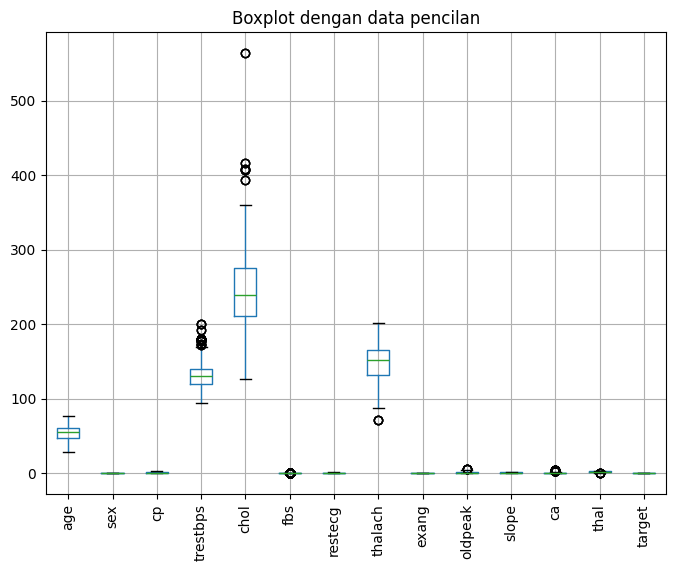

In [11]:
plt.figure(figsize=(8, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot dengan data pencilan')
plt.show()

In [12]:
from scipy.stats import zscore

# Hitung Z-Score untuk setiap kolom numerik
z_scores = np.abs(zscore(df.select_dtypes(include=['float64', 'int64'])))
threshold = 3  # Tentukan ambang batas (biasanya 3)

# Cari baris yang memiliki z-score > threshold
outliers = np.where(z_scores > threshold)
df_bersih = df[(z_scores < threshold).all(axis=1)]


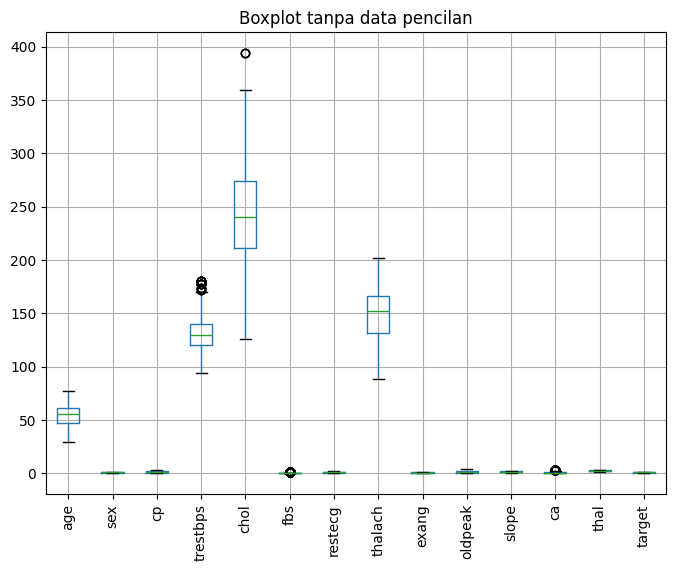

In [13]:
plt.figure(figsize=(8, 6))
df_bersih.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot tanpa data pencilan')
plt.show()

In [14]:
# Menandai outliers pada setiap kolom numerik
def mencari_outliers():
  outliers_count = {}
  for column in df_bersih.select_dtypes(include=['float64', 'int64']).columns:
    # Menghitung IQR
    Q1 = df_bersih[column].quantile(0.25)
    Q3 = df_bersih[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk outliers
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Mencari outliers
    outliers = df_bersih[(df_bersih[column] < batas_bawah) | (df_bersih[column] > batas_atas)]
    outliers_count[column] = outliers.shape[0]
  return outliers_count

pencilan = mencari_outliers()
pencilan = pd.DataFrame(list(pencilan.items()), columns=['Kolom', 'Jumlah Outliers'])
pencilan

,Kolom,Jumlah Outliers
0,age,0
1,sex,0
2,cp,0
3,trestbps,23
4,chol,3
5,fbs,139
6,restecg,0
7,thalach,0
8,exang,0
9,oldpeak,0


In [15]:
total_outliers = pencilan['Jumlah Outliers'].sum()
total_outliers

227

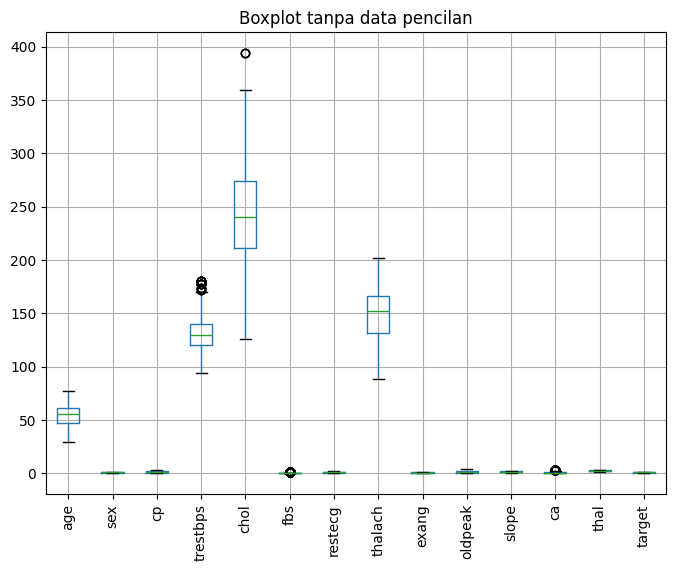

In [16]:
plt.figure(figsize=(8, 6))
df_bersih.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot tanpa data pencilan')
plt.show()

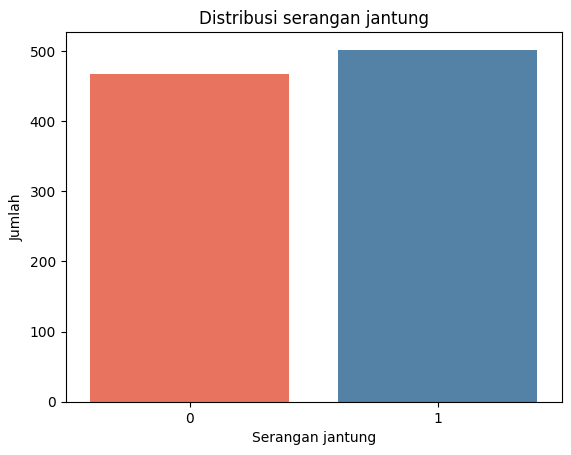

In [17]:
sns.countplot(data=df_bersih, x="target", palette=['#FF6347', '#4682B4'])
plt.title("Distribusi serangan jantung")
plt.xlabel("Serangan jantung")
plt.ylabel("Jumlah")
plt.show()

In [18]:
df_bersih["target"].value_counts()

,count
target,
1,502
0,467


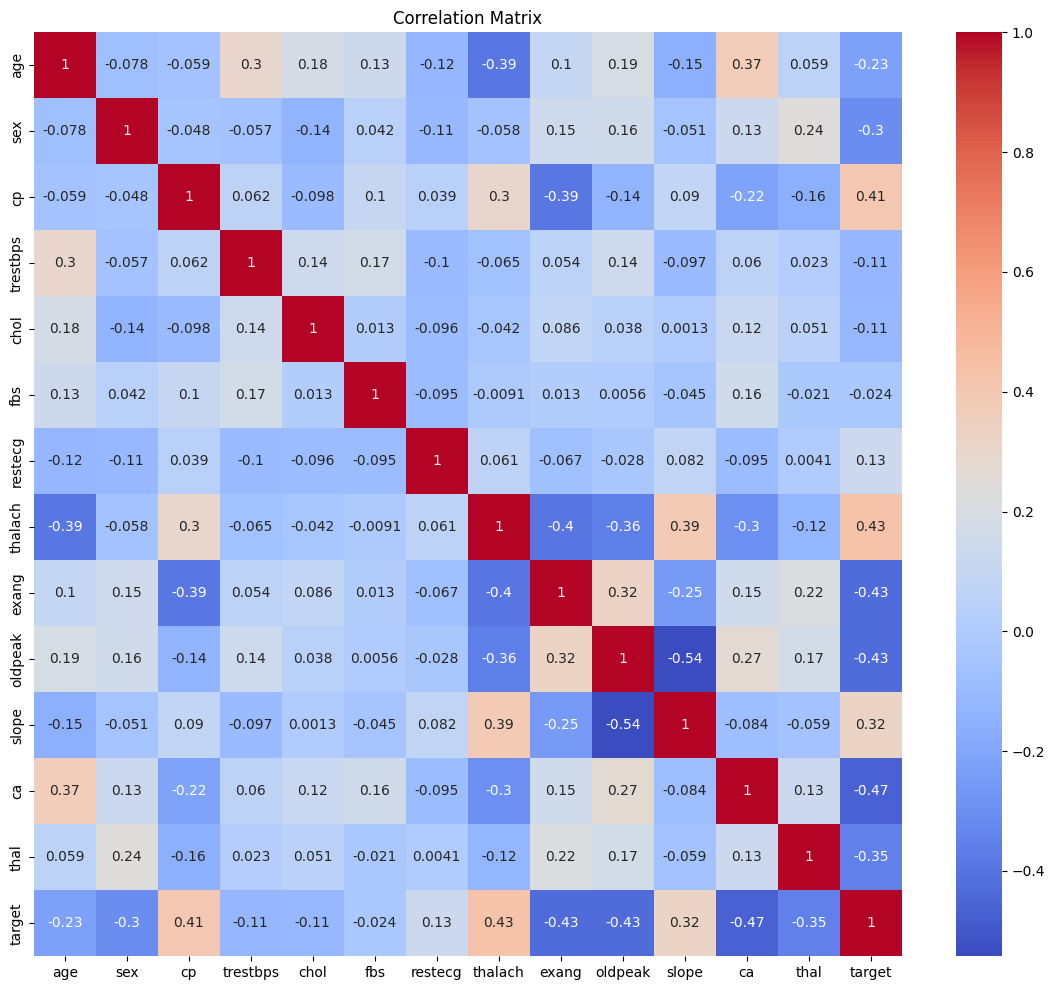

In [19]:
plt.figure(figsize=(14,12))
corr_matrix = df_bersih.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [20]:
X = df_bersih.drop("target", axis=1)
y = df_bersih["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = RandomForestClassifier(n_estimators=200,
                               max_depth=10,
                               min_samples_split=5,
                               min_samples_leaf=3,
                               max_features='sqrt',
                               bootstrap=True,
                               random_state=42)
name = "Prediksi Penyakit Jantung"

In [24]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

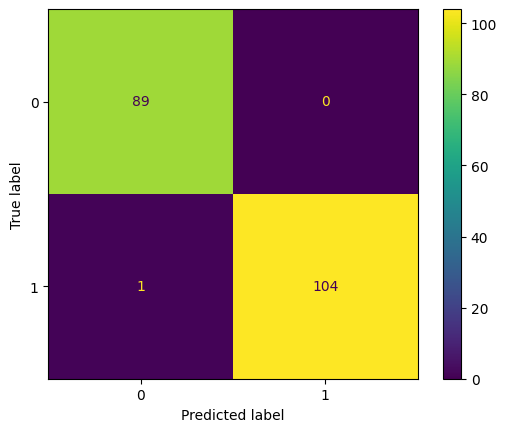

In [25]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"{name} Accuracy: {np.round(accuracy,2)}")
print(classification_report(y_test, y_pred))

Prediksi Penyakit Jantung Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.99      1.00       105

    accuracy                           0.99       194
   macro avg       0.99      1.00      0.99       194
weighted avg       0.99      0.99      0.99       194



In [27]:
print(f"{name} accuracy: {np.round(accuracy,2)}")

Prediksi Penyakit Jantung accuracy: 0.99


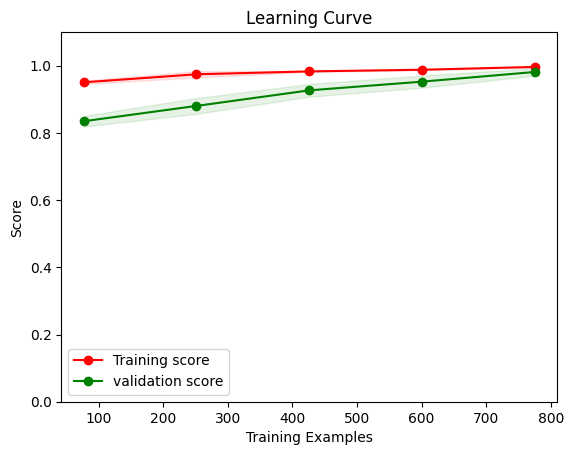

In [28]:
from sklearn.model_selection import learning_curve

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Menghitung rata-rata dan deviasi standar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim((0.0, 1.1))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()


In [58]:
data_input = (60,1,0,117,230,1,1,160,1,1.4,2,2,3)
buat_jadi_array = np.array(data_input)
setelah_itu_reshape = buat_jadi_array.reshape(1,-1)
lalu_standarisasi = scaler.transform(setelah_itu_reshape)

probabilities = model.predict_proba(lalu_standarisasi)

print(probabilities)

[[0.96124257 0.03875743]]


In [60]:
if probabilities[0][0] < probabilities[0][1]:
  if probabilities[0][1] > 0.5:
        print("Jantung Anda dalam bahaya")
        persen = int(probabilities[0][1] * 100)
        print(f"Risikonya sebesar {persen}%")
        print("Silahkan lakukan pemeriksaan lebih lanjut")
if probabilities[0][0] > probabilities[0][1]:
  if probabilities[0][0] > 0.5:
        print("Anda beresiko rendah terkena penyakit jantung")
        persen = int(probabilities[0][1] * 100)
        print(f"Risikonya sebesar {persen}%")

Anda beresiko rendah terkena penyakit jantung
Risikonya sebesar 3%


In [62]:
import pickle
filename = 'penyakit_jantung.sav'
pickle.dump(model, open(filename, 'wb'))